In [5]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.ndimage import gaussian_filter

In [6]:
tag = 4*['dope1'] + 9*['dope1_post']+ 12*['dope2']+ 42*['dope2_post']+ 20*['dope3']+ 68*['dope3_post']+ 16*['dope4']+ 52*['dope4_post']+ 23*['dope5'] + 10*['dope5_post']
len(tag)

256

In [7]:
from pylab import rcParams
from cycler import cycler
rcParams['figure.figsize'] = 16, 9
#rcParams['figure.figsize'] = 5, 5
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18,
                 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in', 'ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 20, 'xtick.major.size': 20, 'legend.fancybox': True,
                 'legend.markerscale': 0.9, 'legend.handlelength': 5.0, 
                  #'axes.prop_cycle': cycler('color',
                   #        ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                    #        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),
                })
colors = ['#66D9EF', '#A6E22E', '#FD971F', '#ae81ff', '#F92672']

mpl.rcParams['grid.linestyle'] = '-.'


In [27]:
import datetime
dict_int = {}
run = []
non_Quartz=[]
Quartz=[]
#ratio=[]

#places.append(i)

dirname = '/eos/user/f/fdolek/SWAN_projects/pods/'


#if not os.path.exists('LAr_f'):
 #   os.makedirs('LAr_f')
##########################################################    
for filename in sorted(os.listdir(dirname)):
    if '.pkl' in filename:
            run_name = ( filename.split('.pkl')[0] ) 
            with open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
##########################################################
            dict_s ={}
            for key, value in mydata.items():
                # filtfilt
                b, a = signal.butter(3, 0.05)
                channel = signal.filtfilt(b, a, value)
                dict_s.update({key:channel})
                #dict_s.update({key:value})
            if run_name =='2020-02-13_19-27-47' or run_name == '2020-02-14_00-34-41' or run_name ==  '2020-02-14_07-35-13':
                #print(run_name)
                non_Qall = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
                non_Qbase = non_Qall - non_Qall[0:180].mean()
            
                Quartzall = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
                Qbase = Quartzall - Quartzall[0:180].mean()
                
                non_Quartz.append(integrate.simps(non_Qbase[230:1300]))
                Quartz.append(integrate.simps(Qbase[230:1300]))
                #ratio.append(integrate.simps(Qbase[230:1300]) / integrate.simps(non_Qbase[230:1300]))
                #print(non_Quartz)
            
            else:
                #print(run_name)
                non_Qall = np.mean([dict_s['Ch1'], dict_s['Ch2'], dict_s['Ch3']], axis=0 )
                non_Qbase = non_Qall - non_Qall[0:390].mean()

                Quartzall = ( np.mean([dict_s['Ch4'], dict_s['Ch5'], dict_s['Ch7']], axis=0 ))
                Qbase = Quartzall - Quartzall[0:390].mean()

                non_Quartz.append(integrate.simps(non_Qbase[390:1500]))
                Quartz.append(integrate.simps(Qbase[390:1500]))
                #ratio.append( integrate.simps(Qbase[390:1500]) / integrate.simps(non_Qbase[390:1500]))
            
            date_time_str = run_name
            date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d_%H-%M-%S')            
            #print('Date:', date_time_obj.date())
            #print('Time:', date_time_obj.time())
            #print(date_time_obj)
            #if date_time_obj < datetime.datetime(2020, 2, 15, 8, 1, 1):
            #    print('dope1')
            
            run.append(date_time_obj)
            #print(run_name, ',' ,integrate.simps(Qbase[390:1500]) ,',' , integrate.simps(non_Qbase[390:1500]) )
#print(len(ratio))
#run
#run

In [28]:
import pandas as pd

Ratio = {'non_Quartz': non_Quartz,
        'Quartz': Quartz,
        'Date': run,
         'Tag':tag,
        }
                                                                                                                        
df = pd.DataFrame(Ratio, columns= ['Date', 'Tag','Quartz', 'non_Quartz'])
#print(ratio['Date'])
df.head()

,Date,Tag,Quartz,non_Quartz
0,2020-02-13 19:27:47,dope1,28609.708273,135609.349994
1,2020-02-14 00:34:41,dope1,19195.753256,115960.746681
2,2020-02-14 07:35:13,dope1,33576.112927,116240.604234
3,2020-02-14 23:04:44,dope1,79780.815026,184496.109145
4,2020-02-15 08:01:01,dope1_post,21988.534308,91568.913642


In [29]:
df['ratio'] = df['Quartz']/df['non_Quartz']

In [30]:
df.tail()

,Date,Tag,Quartz,non_Quartz,ratio
251,2020-05-25 18:50:57,dope5_post,135861.770409,177687.394868,0.764611
252,2020-05-25 21:25:11,dope5_post,181090.562689,207119.201518,0.874330
253,2020-05-26 00:07:01,dope5_post,139106.023960,166733.440896,0.834302
254,2020-05-27 01:20:02,dope5_post,180973.658232,200532.228257,0.902467
255,2020-05-27 09:07:44,dope5_post,155180.229332,193266.330056,0.802935


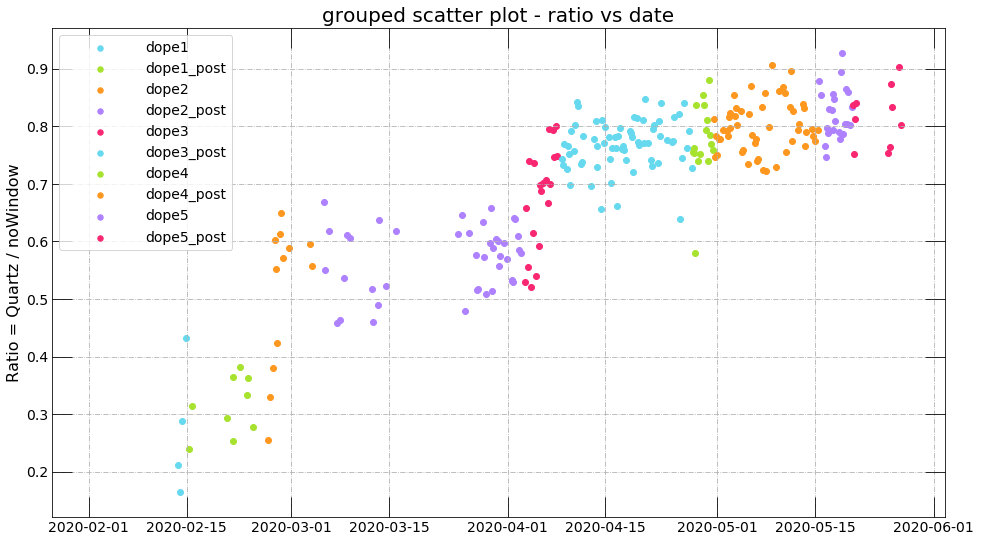

In [31]:
fig,ax = plt.subplots()
ax.set_prop_cycle(cycler(color=colors))
print(df.groupby('Tag')) 
for k,d in df.groupby('Tag'):
    ax.scatter(d['Date'], d['ratio'], label=k, marker='o')
    
plt.ylabel('Ratio = Quartz / noWindow', fontsize=16)
plt.title('grouped scatter plot - ratio vs date',fontsize=20)    
plt.legend()

plt.show()

In [32]:
print(df.groupby('Tag').ratio.mean())

Tag
dope1         0.274446
dope1_post    0.313311
dope2         0.510066
dope2_post    0.570188
dope3         0.676627
dope3_post    0.768349
dope4         0.775516
dope4_post    0.799264
dope5         0.823600
dope5_post    0.817727
Name: ratio, dtype: float64


In [24]:
import seaborn as sns

(737457.0, 737582.0)

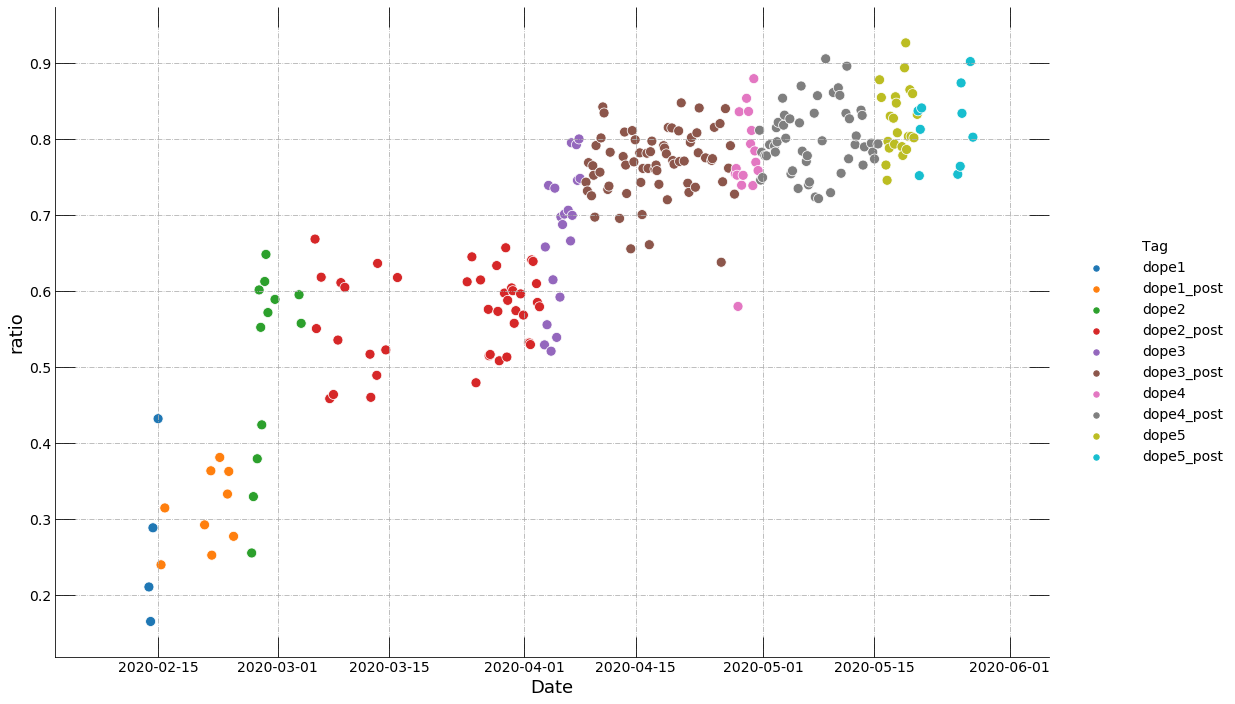

In [25]:
ax.set_prop_cycle(cycler(color=colors))
sns.relplot(x='Date', y='ratio', data=df,
            hue='Tag',
            s=100,
            height=10, 
            aspect=1.5)
plt.xlim(pd.to_datetime('2020-02-02'), # pd.to_datetime('2016') also works
        pd.to_datetime('2020-06-06'))

TypeError: unsupported operand type(s) for /: 'dict' and 'int'

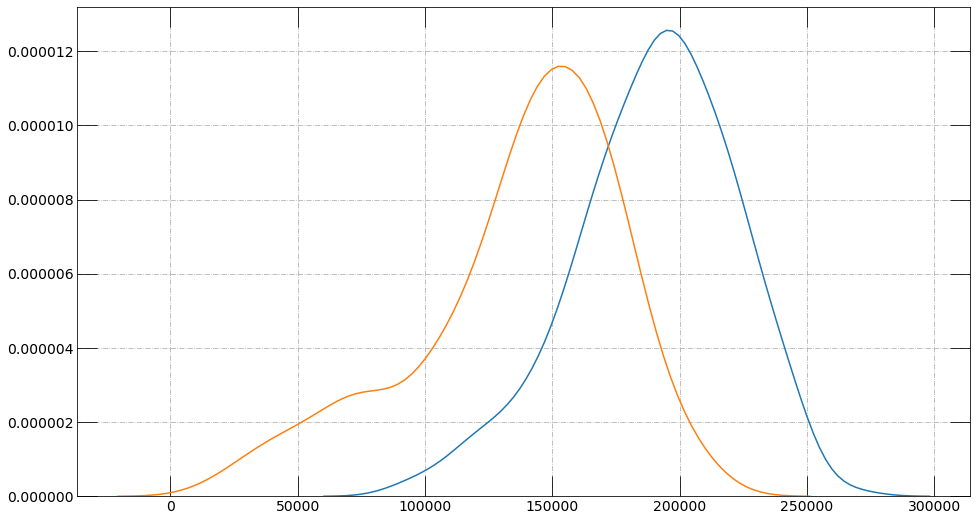

In [26]:
sns.distplot(non_Quartz, kde = True, hist = False)
sns.distplot(Quartz, kde= True, hist =False)
sns.distplot(ratio, kde= True, hist =False)

In [ ]:
sns.distplot(Quartz, kde= True, hist =False)

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.index

In [ ]:
df.index.values

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['Date'],
        df['Quartz'],
        color='purple')

ax.set(xlabel="Date",
       ylabel="integral",
       title="titile, test")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np; np.random.seed(1)
import pandas as pd
plt.rcParams["figure.subplot.right"] = 0.8
v = np.random.rand(30,4)
v[:,2] = np.random.choice(np.arange(1980,2015,5), size=30)
v[:,3] = np.random.randint(5,13,size=30)

df= pd.DataFrame(v, columns=["x","y","year","quality"])
df.year = df.year.values.astype(int)
fig, ax = plt.subplots()
for i, (name, dff) in enumerate(df.groupby("year")):
    c = matplotlib.colors.to_hex(plt.cm.jet(i/7.))
    dff.plot(kind='scatter',x='x',y='y', label=name, c=c, 
             s=dff.quality**2, ax=ax)

leg = plt.legend(loc=(1.03,0), title="Year")
ax.add_artist(leg)

plt.show()

In [7]:
import pandas as pd 

In [8]:
data = pd.read_csv("Dope5_ext_post_16-2020-05-27_09-07-44.csv") 

FileNotFoundError: [Errno 2] File b'Dope5_ext_post_16-2020-05-27_09-07-44.csv' does not exist: b'Dope5_ext_post_16-2020-05-27_09-07-44.csv'